In [2]:
import os
from pathlib import Path
import sys

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import geopandas as gpd
import xarray as xr

In [3]:
parent = os.path.join(Path(os.getcwd()).parent)

print(parent)

sys.path.append(parent)

c:\Users\bruij_kn\OneDrive - Stichting Deltares\Documents\GitHub\thermo-morphological-model\test


In [4]:
SMALL_SIZE = 16
MEDIUM_SIZE = 20
BIGGER_SIZE = 25

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=MEDIUM_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

In [5]:
save_path = Path("C:/Users/bruij_kn/OneDrive - Stichting Deltares/Documents/GitHub/msc-thesis/Figures/Python")

I use the following runs for plotting:
- val_per2_4 (no beach)
- val_per2_8 (bit of beach)
- val_per2_13 (yes beach)

In [6]:
ds_IC = xr.load_dataset("val_per2_4_0000000000.nc")
ds_0 = xr.load_dataset("val_per2_2_0000035052.nc")
ds_no = xr.load_dataset("val_per2_4_0000035052.nc")
ds_bit = xr.load_dataset("val_per2_8_0000035052.nc")
ds_yes = xr.load_dataset("val_per2_13_0000035052.nc")

print(ds_IC)

<xarray.Dataset> Size: 3MB
Dimensions:                          (xgr: 326, depth_id: 150, xgr_xb: 263)
Coordinates:
  * xgr                              (xgr) float64 3kB -6.59 0.5 ... 1.47e+03
  * depth_id                         (depth_id) int64 1kB 0 1 2 ... 147 148 149
  * xgr_xb                           (xgr_xb) float64 2kB -6.59 ... 1.344e+03
Data variables: (12/37)
    timestep_id                      int64 8B 0
    timestamp                        datetime64[ns] 8B 2012-01-01
    cumulative_computational_time    float64 8B 9.502
    zgr                              (xgr) float64 3kB -10.0 -10.0 ... 13.25
    angles                           (xgr) float64 3kB 0.0 0.0 0.0 ... 0.0 0.0
    wave_height                      (xgr_xb) float64 2kB 0.0 0.0 ... 0.0 0.0
    ...                               ...
    latent_heat_flux                 (xgr) float64 3kB 0.0 0.0 0.0 ... 0.0 0.0
    convective_heat_flux             (xgr) float64 3kB 0.0 0.0 0.0 ... 0.0 0.0
    total_heat_flux   

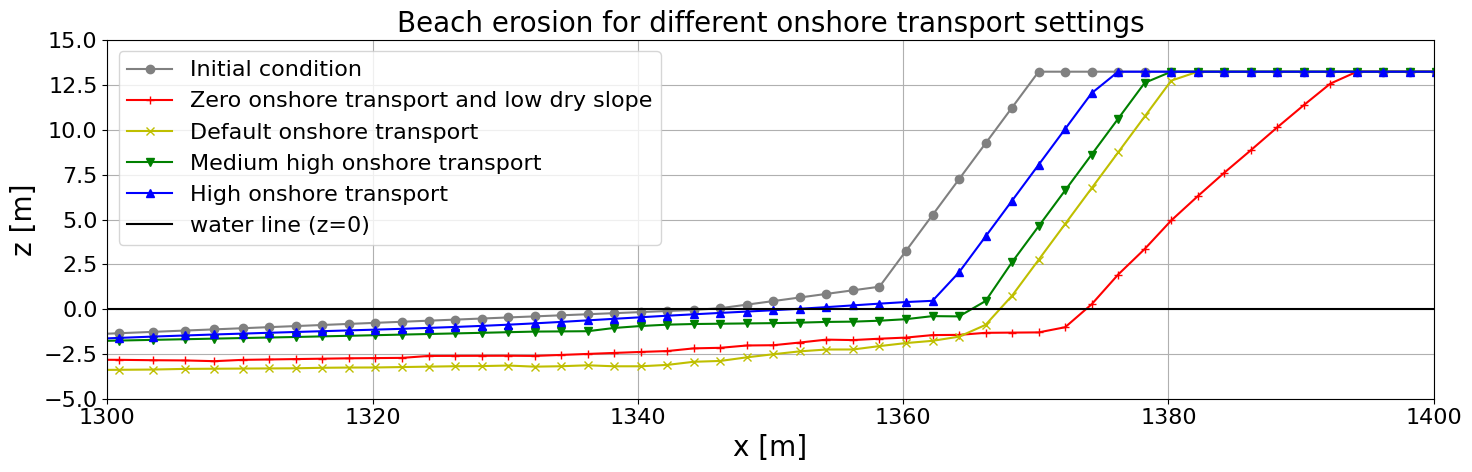

In [7]:
fig, ax = plt.subplots(figsize=(15,5))

ax.plot(ds_IC['xgr'], ds_IC['zgr'], label='Initial condition', color='grey', marker='o')
# ax.scatter(ds_IC['xgr'], ds_IC['zgr'], color='grey')

ax.plot(ds_0['xgr'], ds_0['zgr'], label='Zero onshore transport and low dry slope', color='r', marker='+')
# ax.scatter(ds_0['xgr'], ds_0['zgr'], color='r')

ax.plot(ds_no['xgr'], ds_no['zgr'], label='Default onshore transport', color='y', marker='x')
# ax.scatter(ds_no['xgr'], ds_no['zgr'], color='r')

ax.plot(ds_bit['xgr'], ds_bit['zgr'], label='Medium high onshore transport', color='g', marker='v')
# ax.scatter(ds_bit['xgr'], ds_bit['zgr'], color='b')

ax.plot(ds_yes['xgr'], ds_yes['zgr'], label='High onshore transport', color='b', marker='^')
# ax.scatter(ds_yes['xgr'], ds_yes['zgr'], color='g')


ax.axhline(0, color='k', label='water line (z=0)')

ax.set_xlim((1300, 1400))
ax.set_ylim(-5, 15)

ax.set_xlabel('x [m]')
ax.set_ylabel('z [m]')

ax.grid()

ax.set_title('Beach erosion for different onshore transport settings')

ax.legend(loc='upper left')

fig.tight_layout()

figname = 'beach_erosion.png'

fig.savefig(os.path.join(save_path, figname), bbox_inches='tight', facecolor='white', transparent=False)

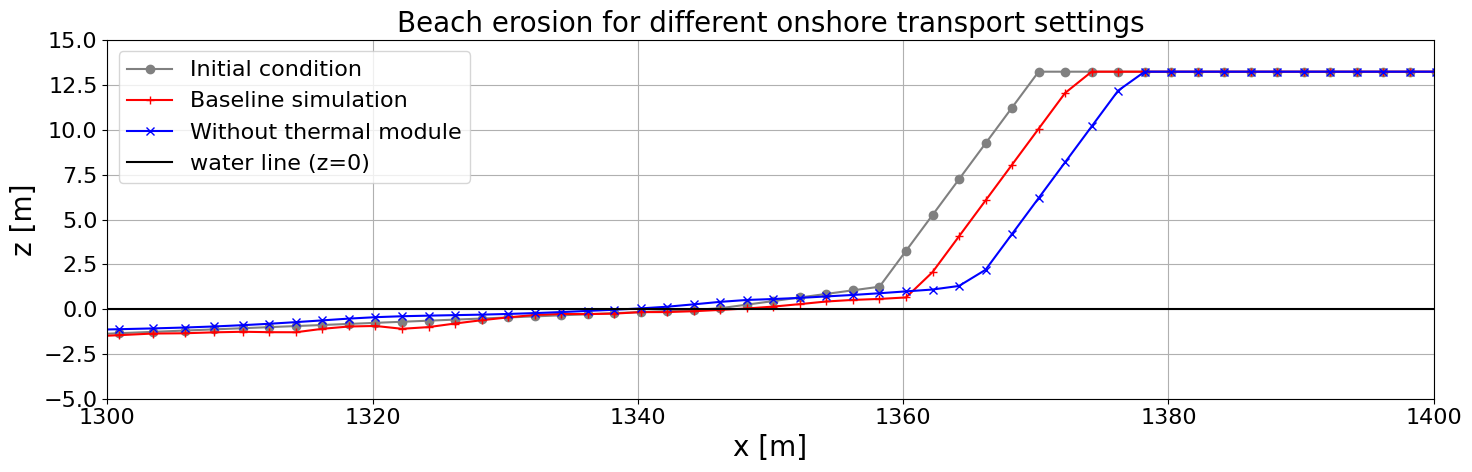

In [10]:
ds_IC = xr.load_dataset("sa_base_0000000000.nc")
ds_base = xr.load_dataset("sa_base_0000017508.nc")
ds_no_therm = xr.load_dataset("sa_lvl3_1_0000017508.nc")

fig, ax = plt.subplots(figsize=(15,5))

ax.plot(ds_IC['xgr'], ds_IC['zgr'], label='Initial condition', color='grey', marker='o')
# ax.scatter(ds_IC['xgr'], ds_IC['zgr'], color='grey')

ax.plot(ds_base['xgr'], ds_base['zgr'], label='Baseline simulation', color='r', marker='+')
# ax.scatter(ds_0['xgr'], ds_0['zgr'], color='r')

ax.plot(ds_no_therm['xgr'], ds_no_therm['zgr'], label='Without thermal module', color='b', marker='x')
# ax.scatter(ds_no['xgr'], ds_no['zgr'], color='r')

ax.axhline(0, color='k', label='water line (z=0)')

ax.set_xlim((1300, 1400))
ax.set_ylim(-5, 15)

ax.set_xlabel('x [m]')
ax.set_ylabel('z [m]')

ax.grid()

ax.set_title('Beach erosion for different onshore transport settings')

ax.legend(loc='upper left')

fig.tight_layout()

figname = 'transect_without_thermal_module.png'

fig.savefig(os.path.join(save_path, figname), bbox_inches='tight', facecolor='white', transparent=False)